In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit


In [37]:
df = pd.read_csv("china_gdp.csv")
print(df.head())
print(df.info())


   Year         Value
0  1960  5.918412e+10
1  1961  4.955705e+10
2  1962  4.668518e+10
3  1963  5.009730e+10
4  1964  5.906225e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1012.0 bytes
None


In [38]:
X = df['Year'].values.astype(float)
y = df['Value'].values.astype(float)


In [39]:
Xc = X - X.mean()

In [40]:
def logistic(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))


In [41]:
# initial guess and bounds
p0 = [y.max(), 0.1, X.mean()-X.mean()]    # note c given in centered coords
lower = [0, 0, Xc.min()]
upper = [y.max()*10, 1.0, Xc.max()]

try:
    popt, pcov = curve_fit(logistic, Xc, y, p0=p0, bounds=(lower,upper), maxfev=50000)
    print("popt:", popt)
    if np.any(np.isinf(pcov)) or np.any(np.isnan(pcov)):
        print("Warning: covariance matrix contains inf or NaN")
except Exception as e:
    print("curve_fit failed:", e)
    popt = None
    pcov = None

popt: [2.08971391e+13 2.15179378e-01 2.70000000e+01]


In [42]:
# fallback: try exponential if logistic fails
if popt is None:
    def expo(x,a,b): return a * np.exp(b*x)
    popt_exp, pcov_exp = curve_fit(expo, Xc, y, p0=[1, 0.05], maxfev=50000)
    y_pred = expo(Xc, *popt_exp)
else:
    y_pred = logistic(Xc, *popt)

In [43]:

# metrics

print("R2:", r2_score(y, y_pred))


R2: 0.9923551111943922


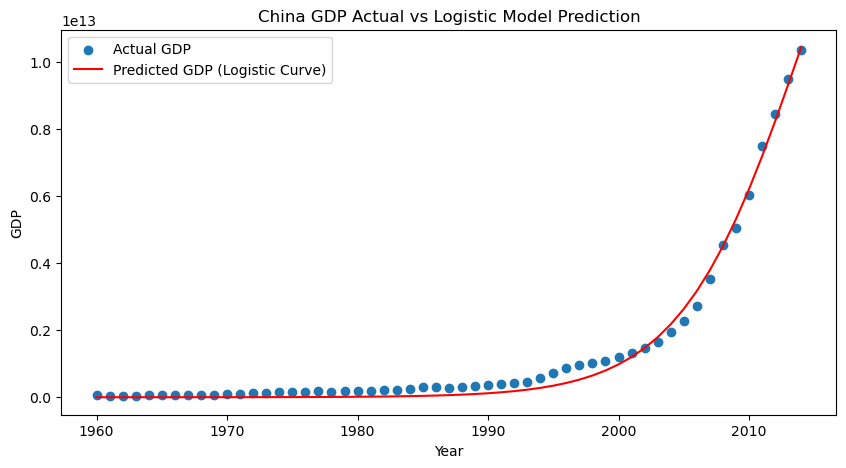

In [44]:
# plots
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Actual GDP')
plt.plot(X, y_pred, 'r-', label='Predicted GDP (Logistic Curve)')
plt.legend(); 
plt.xlabel('Year'); 
plt.ylabel('GDP'); 
plt.title("China GDP Actual vs Logistic Model Prediction")
plt.show()


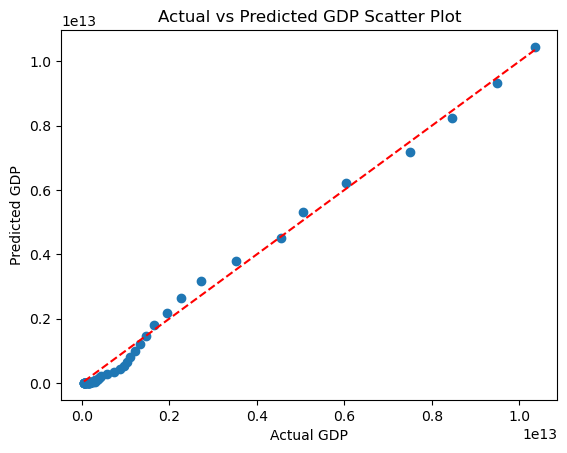

In [45]:
plt.figure()
plt.scatter(y, y_pred,label="Actual vs Predicted");
plt.plot([y.min(), y.max()],[y.min(), y.max()],'r--',label="Ideal Fit")
plt.xlabel('Actual GDP'); 
plt.ylabel('Predicted GDP'); 
plt.title("Actual vs Predicted GDP Scatter Plot")
plt.show()
